In [24]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D


In [25]:

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
noice_factor = 0.25
X_train_noisy=X_train + noice_factor*np.random.normal(loc=0.0, scale = 1.0, size=X_train.shape)
X_test_noisy=X_test + noice_factor*np.random.normal(loc=0.0, scale = 1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy,0.,1.)
X_test_noisy = np.clip(X_test_noisy,0.,1.) 

In [27]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):    
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4) #7 x 7 x 128
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5) #7 x 7 x 64
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6) #14 x 14 x 64
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 32
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7) # 28 x 28 x 32
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded

In [28]:
input_img = Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format


In [29]:
autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())



In [30]:
batch_size = 256
epochs = 20
num_classes = 10
num_classes = 10
autoencoder_train = autoencoder.fit(X_train, X_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1428s 30ms/step - loss: 0.0452 - val_loss: 0.0931
Epoch 2/20
48000/48000 [==============================] - 1363s 28ms/step - loss: 0.0115 - val_loss: 0.0280
Epoch 3/20
48000/48000 [==============================] - 1358s 28ms/step - loss: 0.0078 - val_loss: 0.0117
Epoch 4/20
48000/48000 [==============================] - 1355s 28ms/step - loss: 0.0060 - val_loss: 0.0103
Epoch 5/20
48000/48000 [==============================] - 1355s 28ms/step - loss: 0.0053 - val_loss: 0.0089
Epoch 6/20
48000/48000 [==============================] - 1355s 28ms/step - loss: 0.0043 - val_loss: 0.0054
Epoch 7/20
48000/48000 [==============================] - 1355s 28ms/step - loss: 0.0039 - val_loss: 0.0069
Epoch 8/20
48000/48000 [==============================] - 1351s 28ms/step - loss: 0.0039 - val_loss: 0.0078
Epoch 9/20
48000/48000 [==============================] - 1353s 28ms/step - loss: 0.00

In [31]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
def encoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 256 (small and thick)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

In [32]:
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out

In [33]:
encode = encoder(input_img)
full_model = Model(input_img,fc(encode))

In [34]:
for l1,l2 in zip(full_model.layers[:19],autoencoder.layers[0:19]):
    l1.set_weights(l2.get_weights())

In [35]:
autoencoder.get_weights()[0][1]

array([[[-0.05301833, -0.08680589, -0.04712144,  0.07145554,
         -0.10235564, -0.08324461, -0.13894498, -0.06301942,
          0.26667145,  0.10945209,  0.0692582 ,  0.02815737,
          0.0723436 ,  0.15690902,  0.03885353, -0.1098024 ,
         -0.08918798, -0.03242141,  0.12599508, -0.0694134 ,
         -0.10891053,  0.16022669, -0.04781778,  0.09204494,
         -0.00841981,  0.03943402,  0.19969167,  0.02316775,
          0.14534354,  0.14067161, -0.1445331 , -0.05335287]],

       [[-0.06529143,  0.17082874,  0.17614987, -0.1258524 ,
          0.04892865, -0.02754449,  0.14003503,  0.06514513,
          0.08252808,  0.09015143, -0.08478993,  0.11053484,
          0.16429533, -0.09054474,  0.10749266, -0.10537624,
          0.10115259,  0.10078125, -0.11886736,  0.11791065,
         -0.03131124, -0.06315941, -0.03551893,  0.17250095,
         -0.16974673,  0.10880461, -0.04369926, -0.09053458,
         -0.13812774, -0.00029842, -0.07086257,  0.0274252 ]],

       [[ 0.056004

In [36]:
full_model.get_weights()[0][1]

array([[[-0.05301833, -0.08680589, -0.04712144,  0.07145554,
         -0.10235564, -0.08324461, -0.13894498, -0.06301942,
          0.26667145,  0.10945209,  0.0692582 ,  0.02815737,
          0.0723436 ,  0.15690902,  0.03885353, -0.1098024 ,
         -0.08918798, -0.03242141,  0.12599508, -0.0694134 ,
         -0.10891053,  0.16022669, -0.04781778,  0.09204494,
         -0.00841981,  0.03943402,  0.19969167,  0.02316775,
          0.14534354,  0.14067161, -0.1445331 , -0.05335287]],

       [[-0.06529143,  0.17082874,  0.17614987, -0.1258524 ,
          0.04892865, -0.02754449,  0.14003503,  0.06514513,
          0.08252808,  0.09015143, -0.08478993,  0.11053484,
          0.16429533, -0.09054474,  0.10749266, -0.10537624,
          0.10115259,  0.10078125, -0.11886736,  0.11791065,
         -0.03131124, -0.06315941, -0.03551893,  0.17250095,
         -0.16974673,  0.10880461, -0.04369926, -0.09053458,
         -0.13812774, -0.00029842, -0.07086257,  0.0274252 ]],

       [[ 0.056004

In [37]:
for layer in full_model.layers[0:19]:
    layer.trainable = False

In [38]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [39]:
full_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_29 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_30 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 14, 14, 64)        1849

In [41]:
classify_train = full_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 244s 5ms/step - loss: 0.1331 - accuracy: 0.9592 - val_loss: 0.1111 - val_accuracy: 0.9684
Epoch 2/20
48000/48000 [==============================] - 261s 5ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.1001 - val_accuracy: 0.9725
Epoch 3/20
48000/48000 [==============================] - 266s 6ms/step - loss: 0.0164 - accuracy: 0.9955 - val_loss: 0.0996 - val_accuracy: 0.9732
Epoch 4/20
48000/48000 [==============================] - 267s 6ms/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0924 - val_accuracy: 0.9757
Epoch 5/20
48000/48000 [==============================] - 288s 6ms/step - loss: 0.0023 - accuracy: 0.9999 - val_loss: 0.0925 - val_accuracy: 0.9772
Epoch 6/20
48000/48000 [==============================] - 288s 6ms/step - loss: 8.2462e-04 - accuracy: 1.0000 - val_loss: 0.0911 - val_accuracy: 0.9784
Epoch 7/20
48000/48000 [==============================] - 

In [42]:
full_model.save_weights('autoencoder_classification.h5')

In [43]:
for layer in full_model.layers[0:19]:
    layer.trainable = True

In [44]:
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [46]:
classify_train = full_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 895s 19ms/step - loss: 0.0626 - accuracy: 0.9827 - val_loss: 0.1093 - val_accuracy: 0.9750
Epoch 2/20
48000/48000 [==============================] - 938s 20ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.3221 - val_accuracy: 0.9634
Epoch 3/20
48000/48000 [==============================] - 942s 20ms/step - loss: 0.0263 - accuracy: 0.9921 - val_loss: 0.0983 - val_accuracy: 0.9801
Epoch 4/20
48000/48000 [==============================] - 945s 20ms/step - loss: 0.0174 - accuracy: 0.9951 - val_loss: 0.0761 - val_accuracy: 0.9827
Epoch 5/20
48000/48000 [==============================] - 948s 20ms/step - loss: 0.0132 - accuracy: 0.9961 - val_loss: 0.0916 - val_accuracy: 0.9829
Epoch 6/20
48000/48000 [==============================] - 948s 20ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0735 - val_accuracy: 0.9837
Epoch 7/20
48000/48000 [==============================] 

In [47]:
full_model.save_weights('classification_complete.h5')

In [50]:
classify_train.history

{'val_loss': [0.10934751335779826,
  0.32207492339611055,
  0.09834140582902667,
  0.07610439281433355,
  0.09162611528304114,
  0.07354372905722509,
  0.0814063727017492,
  0.08426886611276617,
  0.09813484873871009,
  0.11429613154133161,
  0.09926916282624006,
  0.07559608460404676,
  0.08060731239494635,
  0.07561166323911554,
  0.07645843190949381,
  0.11215635419916362,
  0.0695532941793402,
  0.08256541590393529,
  0.07050627870946725,
  0.0758837060083976],
 'val_accuracy': [0.9750000238418579,
  0.9634166955947876,
  0.9800833463668823,
  0.9827499985694885,
  0.9829166531562805,
  0.9836666584014893,
  0.9858333468437195,
  0.9850000143051147,
  0.9850833415985107,
  0.9837499856948853,
  0.9838333129882812,
  0.9884166717529297,
  0.9868333339691162,
  0.9871666431427002,
  0.9877499938011169,
  0.984000027179718,
  0.9880833625793457,
  0.9872499704360962,
  0.9900833368301392,
  0.9885833263397217],
 'loss': [0.06260831100641129,
  0.03089604129207631,
  0.0263194816438481

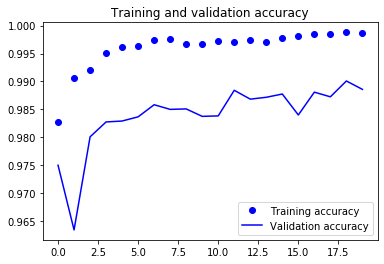

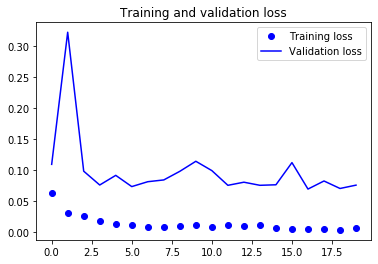

In [52]:
accuracy = classify_train.history['accuracy']
val_accuracy = classify_train.history['val_accuracy']
loss = classify_train.history['loss']
val_loss = classify_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [54]:
test_eval = full_model.evaluate(X_test, y_test, verbose=0)

In [55]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.06794448170440842
Test accuracy: 0.9878000020980835


In [ ]:
predicted_classes = full_model.predict(X_test)

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [ ]:
predicted_classes.shape, test_labels.shape

In [9]:
autoencoder.fit(X_train, X_train, validation_split=0.1,
                epochs=50,
                batch_size=128,
                shuffle=True
                )

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 124s 2ms/step - loss: 0.2296 - val_loss: 0.1820
Epoch 2/50
54000/54000 [==============================] - 123s 2ms/step - loss: 0.1687 - val_loss: 0.1569
Epoch 3/50
54000/54000 [==============================] - 122s 2ms/step - loss: 0.1514 - val_loss: 0.1466
Epoch 4/50
54000/54000 [==============================] - 122s 2ms/step - loss: 0.1416 - val_loss: 0.1373
Epoch 5/50
54000/54000 [==============================] - 123s 2ms/step - loss: 0.1345 - val_loss: 0.1293
Epoch 6/50
54000/54000 [==============================] - 123s 2ms/step - loss: 0.1292 - val_loss: 0.1260
Epoch 7/50
54000/54000 [==============================] - 124s 2ms/step - loss: 0.1258 - val_loss: 0.1243
Epoch 8/50
54000/54000 [==============================] - 123s 2ms/step - loss: 0.1229 - val_loss: 0.1208
Epoch 9/50
54000/54000 [==============================]

In [14]:
scores = autoencoder.evaluate(X_test, X_test, verbose=0)
print(scores)

0.10329685904979706


In [ ]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 

X_train_noisy = np.clip(x_train_noisy, 0., 1.)
X_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])